<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Opis" data-toc-modified-id="Opis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Opis</a></span></li><li><span><a href="#Dane" data-toc-modified-id="Dane-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dane</a></span><ul class="toc-item"><li><span><a href="#Informacje" data-toc-modified-id="Informacje-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Informacje</a></span></li><li><span><a href="#Przygotowanie-danych-do-analizy" data-toc-modified-id="Przygotowanie-danych-do-analizy-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Przygotowanie danych do analizy</a></span></li></ul></li><li><span><a href="#Analiza" data-toc-modified-id="Analiza-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analiza</a></span><ul class="toc-item"><li><span><a href="#Czy-gracze-zostali-równo-podzieleni?" data-toc-modified-id="Czy-gracze-zostali-równo-podzieleni?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Czy gracze zostali równo podzieleni?</a></span></li><li><span><a href="#Zainteresowanie-grą" data-toc-modified-id="Zainteresowanie-grą-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Zainteresowanie grą</a></span></li><li><span><a href="#Retencja-po-pierwszym-dniu" data-toc-modified-id="Retencja-po-pierwszym-dniu-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Retencja po pierwszym dniu</a></span></li><li><span><a href="#Retencja-po-7-dniach" data-toc-modified-id="Retencja-po-7-dniach-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Retencja po 7 dniach</a></span></li></ul></li><li><span><a href="#Wnioski" data-toc-modified-id="Wnioski-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Wnioski</a></span></li></ul></div>

# Opis
[Cookie cats](https://play.google.com/store/apps/details?id=dk.tactile.cookiecats&hl=pl) to mobilna gra logiczna typu dopasuj-3 w której gracz rozdaje ciastka, które posiada. Jest on jednak w tym ograniczony przez zasady danego poziomu: ilość ruchów, pułap punktów itp. Wraz z postępem gry gracz dociera do bramek, które uniemożliwiają przez pewien czas dalszą grę. Bramki te można ominąć przez odpowiedni zakup w aplikacji.

W projekcie tym przeanalizuję jak przesunięcie pierwszej branki z poziomu 30 na 40 wpłynęło na graczy i ich zainteresowanie dalszą grą. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

# Dane
## Informacje
Dane pochodzą z repozytorium [ryanschaub](https://github.com/ryanschaub/Mobile-Games-A-B-Testing-with-Cookie-Cats).

Dane zawierają informacje zebrane podczas użytkowania aplikacji przez graczy, którzy zainstalowali grę gdy przeprowadzano testy.

In [3]:
! head -n 5 cookie_cats_original.csv

* `userid` - unikatowy numer gracza
* `version` - wskazuje w której grupie był gracz: gate at lvl 30 - grupa kontrolna, gate at lvl 40 - grupa z nowym położeniem pierwszej bramki
* `sum_gamerounds` - liczba rund wykonanych przez gracza podczas pierwszych 14 dni po instalacji
* `retention_1` - czy gracz wrócił po 1 dniu od instalacji?
* `retention_7` - czy gracz wrócił po 7 dniach od instalacji?

Po instalacji gry każdy z graczy był losowo przydzielony do jednej z grup.

In [2]:
df = pd.read_csv('cookie_cats_original.csv')

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,1711136,Gate at lvl 40,20,False,False
1,2964858,Gate at lvl 40,20,True,False
2,3433251,Gate at lvl 40,20,False,False
3,8452399,Gate at lvl 40,20,True,True
4,2854126,Gate at lvl 40,20,True,True


## Przygotowanie danych do analizy

Zobaczmy z jakimi danymi mamy do czynienia.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
userid            90189 non-null int64
version           90189 non-null object
sum_gamerounds    90189 non-null int64
retention_1       90189 non-null bool
retention_7       90189 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


Mamy tabelę z 90189 rekordamy i widzimy, że nie ma żadnych brakujących wartości.

Czy wszystkie wartości w kolumnie `userid` są unikatowe?

In [3]:
df['userid'].value_counts().head()

6843406    1
9403450    1
6572764    1
547550     1
6312671    1
Name: userid, dtype: int64

Przypiszmy czytelniejsze wartości do kolumny `version`.

In [4]:
ver_val = df['version'].unique().tolist()
print(ver_val)

['Gate at lvl 40', 'Gate at lvl 30']


In [5]:
ver_val_replace = dict(zip(ver_val, ('gate40', 'gate30')))
print(ver_val_replace)

{'Gate at lvl 30': 'gate30', 'Gate at lvl 40': 'gate40'}


In [6]:
df['version'] = df['version'].map(ver_val_replace)

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,1711136,gate40,20,False,False
1,2964858,gate40,20,True,False
2,3433251,gate40,20,False,False
3,8452399,gate40,20,True,True
4,2854126,gate40,20,True,True


Jesteśmy gotowi do analizy.

# Analiza
W dalszej części będę się posługiwać pojęciem *retencja*, które oznacza liczbę graczy, którzy pozostają w grze.

## Czy gracze zostali równo podzieleni?

In [8]:
print('Podział graczy:')
df['version'].value_counts()

Podział graczy:


gate40    45489
gate30    44700
Name: version, dtype: int64

Widzimy, że liczność każdej z grup jest bardzo zbliżona.

## Zainteresowanie grą
Zobaczmy jak zainteresowanie grą zmienia się wraz z ilością rozegranych rund.

In [18]:
df_plot = (df.groupby('sum_gamerounds')['userid']
               .count()
               .iloc[:80])
df_plot.head(2)

sum_gamerounds
0    3994
1    5538
Name: userid, dtype: int64

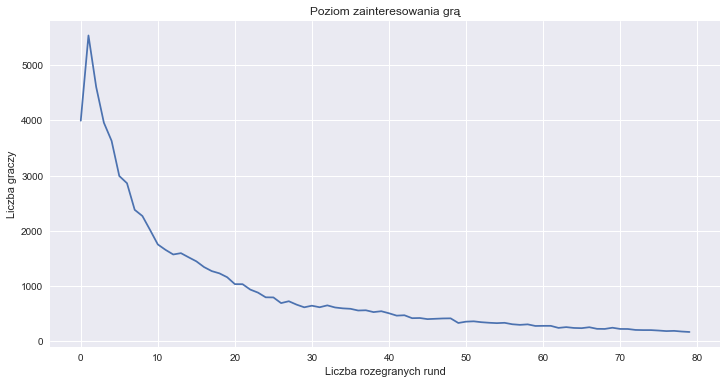

In [23]:
plt.figure(figsize=(12,6))

df_plot.plot()

plt.title('Poziom zainteresowania grą')
plt.xlabel('Liczba rozegranych rund')
plt.ylabel('Liczba graczy')

plt.show()

Z wykresu widzimy, że dużo użytkowników instaluje grę, po czym nigdy w nią nie zagra. Dodatkowo wielu traci zainteresowanie grą już po kilku pierwszych rundach. Co może sugerować, że tym osobom nie przypadła do gustu.

## Retencja po pierwszym dniu
Retencja po pierwszym dniu jest ważnym wskaźnikiem, który mówi jak interesująca jest gra. Im wyższa wartość tym łatwiej jest zbudować stałą grupę graczy.

In [9]:
df.retention_1.mean()

0.44520950448502589

Widzimy, że po pierwszym dniu około 44.5% graczy powróciło do gry. Zobaczmy jak ten wskaźnik wygląda dla poszczególnych grup.

In [10]:
df.groupby('version')['retention_1'].mean()

version
gate30    0.448188
gate40    0.442283
Name: retention_1, dtype: float64

Retencja po jednym dniu w grupie kontrolnej wynosi 44.8%. Widzimy, że gdy bramka została przesunięta na poziom 40 to wartość nieznacznie zmalała do 44.2%.

Sprawdźmy jakie jest prawdopodobieństwo, że ta różnica będzie miała znaczenie w przyszłości.

In [11]:
bs_1d = []
# liczymy średnią dla każdej z 10,000 losowych próbek do bootstrapu
for _ in range(10000):
    bs_mean = (df.sample(frac=1, replace=True)
               .groupby('version')['retention_1']
               .mean())
    bs_1d.append(bs_mean)

bs_1d = pd.DataFrame(bs_1d)

Zobaczmy teraz gęstości rozkładu zmiennej losowej wyznaczoną na podstawie uzyskanej próby.

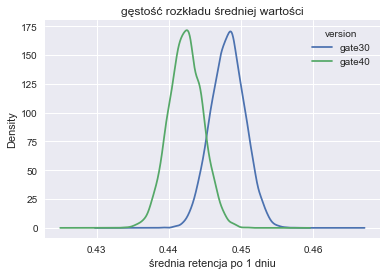

In [26]:
plt.figure(figsize=(8,5));
bs_1d.plot(kind='kde');
plt.title('gęstość rozkładu średniej wartości');
plt.xlabel('średnia retencja po 1 dniu')
plt.show()

Na powyższym wykresie widać różnicę dla tych dwóch grup. Przyjżyjmy się jej dokładniej.

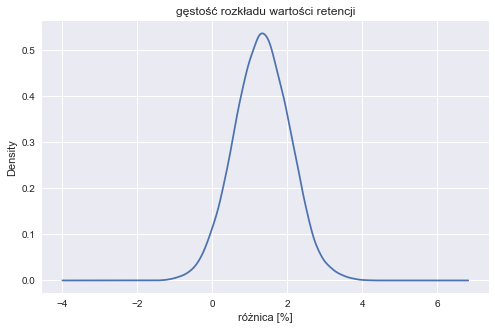

In [31]:
bs_1d['diff'] = (bs_1d['gate30'] - bs_1d['gate40']) / bs_1d['gate40'] * 100

plt.figure(figsize=(8,5));
bs_1d['diff'].plot(kind='kde');
plt.title('gęstość rozkładu wartości retencji');
plt.xlabel('różnica [%]')
plt.show()

Policzmy p-wartość dla naszej hipotezy, że zmiana bramki będzie miała negatywny wpływ na retencję w przyszłości.

In [35]:
print('p =', (bs_1d['diff'] > 0).mean())

p = 0.962


Możemy zatem stwierdzić, że przesunięcie bramki na 40 poziom najprawdopodobniej nie jest dobrym krokiem.

## Retencja po 7 dniach
Żeby upewnić się w naszych wnioskach powtórzmy całą analizę dla danych po 7 dniach.

In [36]:
df.retention_7.mean()

0.1860648194347426

Po 7 dniach już tylko 18.6% graczy nadal jest zaangażowanych w grę.

In [37]:
df.groupby('version')['retention_7'].mean()

version
gate30    0.190201
gate40    0.182000
Name: retention_7, dtype: float64

Wśród grupy kontrolnej mamy 19%, a z grupy testowanej jest 18.2%. Po siedmiu dniach różnica nieznacznie wzrosła w porównaniu do wartości po jednym dniu.

In [38]:
bs_7d = []
# liczymy średnią dla każdej z 10,000 losowych próbek do bootstrapu
for _ in range(10000):
    bs_mean = (df.sample(frac=1, replace=True)
               .groupby('version')['retention_1']
               .mean())
    bs_7d.append(bs_mean)

bs_7d = pd.DataFrame(bs_7d)

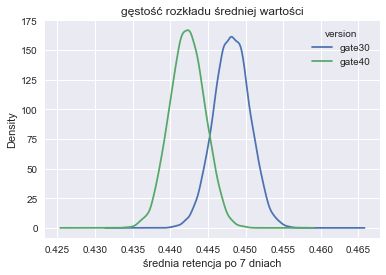

In [39]:
plt.figure(figsize=(8,5));
bs_7d.plot(kind='kde');
plt.title('gęstość rozkładu średniej wartości');
plt.xlabel('średnia retencja po 7 dniach')
plt.show()

Wyraźnie widzimy różnicę w rozkładzie gęstości. Zobaczmy jak wygląda jej rozkład.

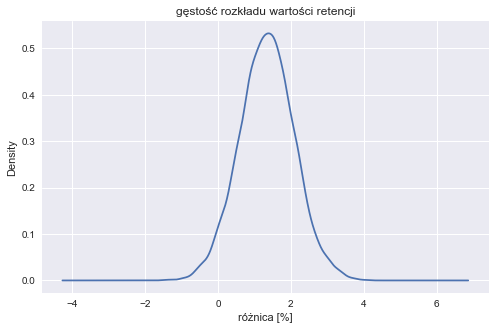

In [40]:
bs_7d['diff'] = (bs_7d['gate30'] - bs_7d['gate40']) / bs_7d['gate40'] * 100

plt.figure(figsize=(8,5));
bs_7d['diff'].plot(kind='kde');
plt.title('gęstość rozkładu wartości retencji');
plt.xlabel('różnica [%]')
plt.show()

Policzmy jeszcze p_wartość dla sprawdzenia hipotezy.

In [41]:
print('p =', (bs_7d['diff'] > 0).mean())

p = 0.9618


Ponownie widzimy bardzo duzą wartość, która potwierdza wcześniejszą obserwację dla retencji po 1 dniu.

# Wnioski
Dla jedno- i siedmiodniowej retencji uzyskaliśmy p-wartość kolejno 0.962 i 0.9618 co wskazuje na wysokie prawdopodobieństwo tego, że przeniesienie pierszej bramki z poziomu 30 na 40 wpłynie negatywnie na zainteresowanie graczy dalszą grą.

Wniosek jest zatem prosty: bramka powinna pozostać na 30 poziomie.